In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("/content/food_orders_new_delhi.csv")
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [4]:
from datetime import datetime

In [5]:
df['Order Date and Time']=pd.to_datetime(df['Order Date and Time'])
df["Delivery Date and Time"]=pd.to_datetime(df["Delivery Date and Time"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   datetime64[ns]
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    815 non-null    object        
 9   Commission Fee          1000 non-null   int64         
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
dtypes: datetime64[ns](2), int64(6), object(4)
memory 

In [7]:
df['Discounts and Offers']=df['Discounts and Offers'].str.split(" ",expand=True)[0].str.split("%",expand=True)[0]
df['Discounts and Offers'].fillna(0,inplace=True)

In [8]:
df['discount percentage']=df['Discounts and Offers'].astype(float)
df.drop(columns=['Discounts and Offers'],inplace=True)

In [9]:
df['dicount amount']=(df['Order Value']*df['discount percentage'])/100

In [10]:
df['total cost']=df['Delivery Fee']+df['Payment Processing Fee']+df['dicount amount']
df['revenue']=df['Commission Fee']
df['profit']=df['revenue']-df['total cost']

In [11]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,discount percentage,dicount amount,total cost,revenue,profit
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,150,47,0,5.0,95.70,142.70,150,7.30
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,198,23,0,10.0,98.60,161.60,198,36.40
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,195,45,0,15.0,140.55,215.55,195,-20.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,146,27,0,0.0,0.00,77.00,146,69.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,130,50,0,50.0,996.00,1076.00,130,-946.00


In [12]:
total_orders=df.shape[0]
total_revenue=df['revenue'].sum()
total_costs=df['total cost'].sum()
total_profit=df['profit'].sum()
overall_metrics = {
    "Total Orders": total_orders,
    "Total Revenue": total_revenue,
    "Total Costs": total_costs,
    "Total Profit": total_profit
}

In [13]:
overall_metrics

{'Total Orders': 1000,
 'Total Revenue': 126990,
 'Total Costs': 232709.85,
 'Total Profit': -105719.85}

In [14]:
import matplotlib.pyplot as plt

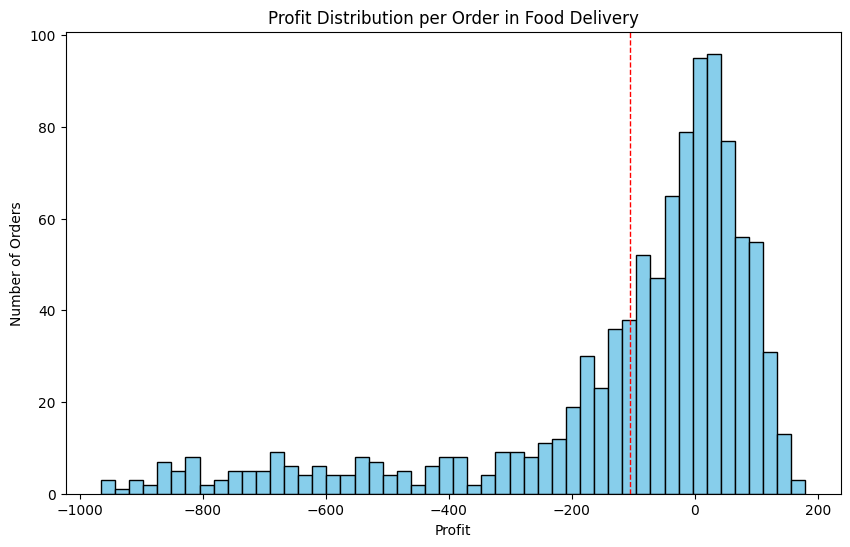

In [15]:
# histogram of profits per order
plt.figure(figsize=(10, 6))
plt.hist(df['profit'], bins=50, color='skyblue', edgecolor='black')
plt.title('Profit Distribution per Order in Food Delivery')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(df['profit'].mean(), color='red', linestyle='dashed', linewidth=1) # draw vertical line at the mean of profit
plt.show()

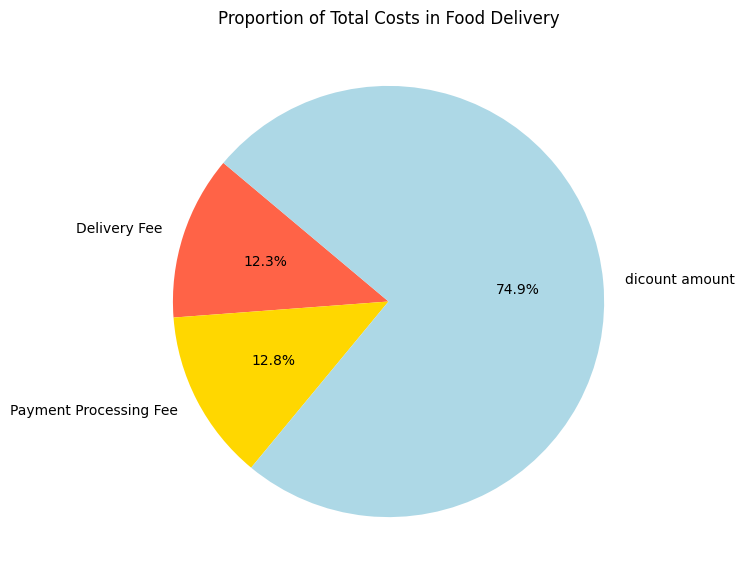

In [16]:
costs_breakdown = df[['Delivery Fee', 'Payment Processing Fee', 'dicount amount']].sum()
plt.figure(figsize=(7, 7))
plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%', startangle=140, colors=['tomato', 'gold', 'lightblue'])
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

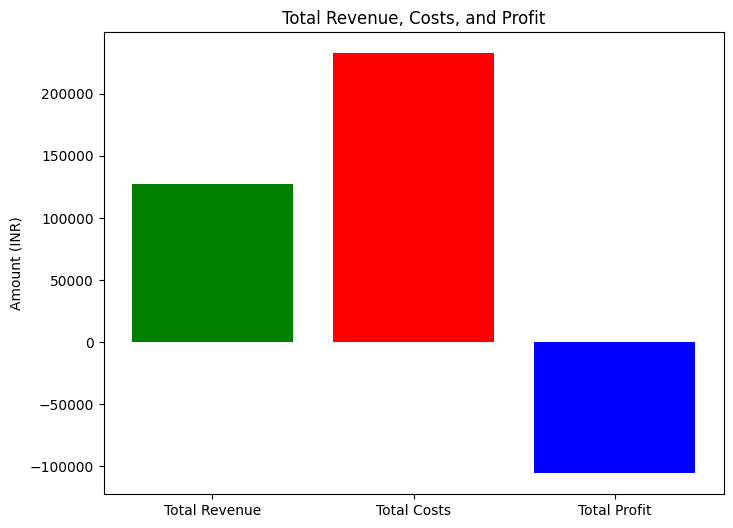

In [17]:
totals = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [total_revenue, total_costs, total_profit]

plt.figure(figsize=(8, 6))
plt.bar(totals, values, color=['green', 'red', 'blue'])
plt.title('Total Revenue, Costs, and Profit')
plt.ylabel('Amount (INR)')
plt.show()

In [18]:
profitable_orders=df[df['profit']>0]

In [19]:
profitable_orders['commission perctange']=(profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100

<ipython-input-19-f2870e0f3333>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['commission perctange']=(profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100


In [20]:
profitable_orders['Effective Discount Percentage'] = (profitable_orders['dicount amount'] / profitable_orders['Order Value']) * 100

<ipython-input-20-6e94147ccbc1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Effective Discount Percentage'] = (profitable_orders['dicount amount'] / profitable_orders['Order Value']) * 100


In [21]:
# calculate the new averages
new_avg_commission_percentage = profitable_orders['commission perctange'].mean()
new_avg_discount_percentage = profitable_orders['Effective Discount Percentage'].mean()
new_avg_commission_percentage,new_avg_discount_percentage

(30.508436145149435, 5.867469879518072)

In [22]:
recommend_commission_rate=30.0
recommend_discount_rate=6.0
df["simulted commission fee"]=df['Order Value']*(recommend_commission_rate/100) # commosion after new commosion rate
df["simulated discount amount"]=df['Order Value']*(recommend_discount_rate/100) # discount amount after new discount
df["simulated total cost"]=(df['Delivery Fee']+df['Payment Processing Fee']+df['simulated discount amount'])
df['simulated profit']=df['simulted commission fee']-df['simulated total cost']

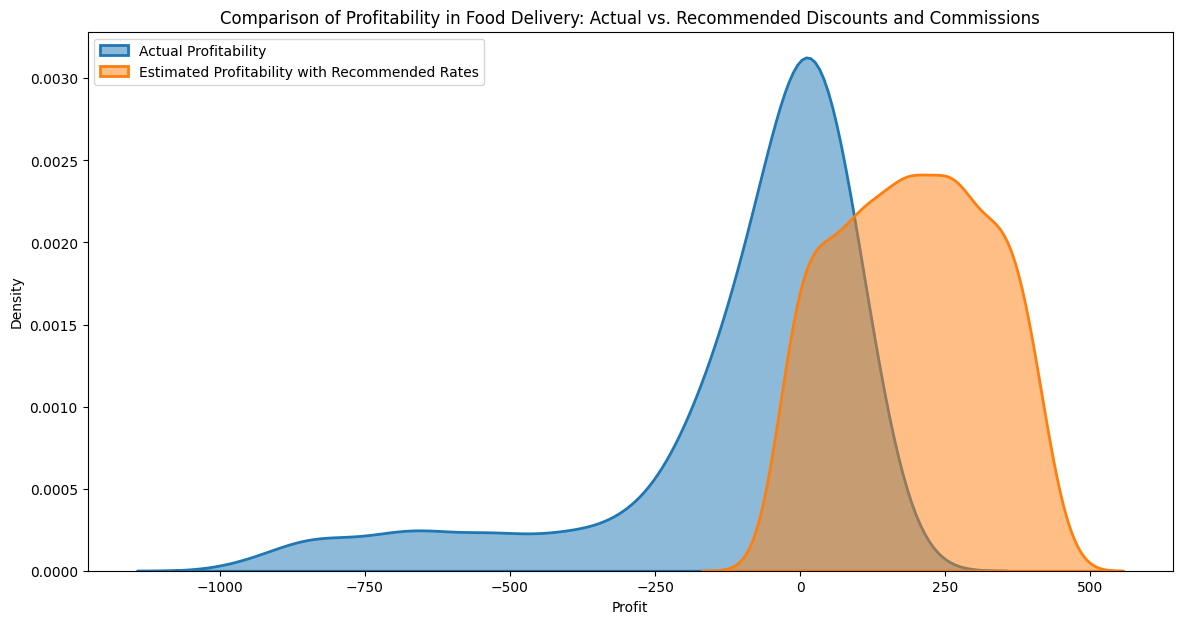

In [25]:
# visualizing the comparison
import seaborn as sns

plt.figure(figsize=(14, 7))

# actual profitability
sns.kdeplot(df['profit'], label='Actual Profitability', fill=True, alpha=0.5, linewidth=2)

# simulated profitability
sns.kdeplot(df['simulated profit'], label='Estimated Profitability with Recommended Rates', fill=True, alpha=0.5, linewidth=2)

plt.title('Comparison of Profitability in Food Delivery: Actual vs. Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()